Bresat Cancer Prediction

In [1]:
# data manipulators
import pandas as pd
import numpy as np

# machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

# deep learning libraries
import seaborn as sns

# visualization libraries
import matplotlib.pyplot as plt

# data serialization
import pickle

# pretty print
from pprint import pprint

In [7]:
raw_data = pd.read_csv('../data/breast_cancer.csv')


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   sample_code_number           683 non-null    int64
 1   clump_thickness              683 non-null    int64
 2   uniformity_of_cell_size      683 non-null    int64
 3   uniformity_of_cell_shape     683 non-null    int64
 4   marginal_adhesion            683 non-null    int64
 5   single_epithelial_cell_size  683 non-null    int64
 6   bare_nuclei                  683 non-null    int64
 7   bland_chromatin              683 non-null    int64
 8   normal_nucleoli              683 non-null    int64
 9   mitoses                      683 non-null    int64
 10  class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
# Preprocess the data
raw_data.columns = raw_data.columns.str.lower().str.replace(' ', '_')


In [18]:
for i in raw_data.columns:
    if i != "sample_code_number":
        print(f"{i}:", raw_data[i].unique())

clump_thickness: [ 5  3  6  4  8  1  2  7 10  9]
uniformity_of_cell_size: [ 1  4  8 10  2  3  7  5  6  9]
uniformity_of_cell_shape: [ 1  4  8 10  2  3  5  6  7  9]
marginal_adhesion: [ 1  5  3  8 10  4  6  2  9  7]
single_epithelial_cell_size: [ 2  7  3  1  6  4  5  8 10  9]
bare_nuclei: [ 1 10  2  4  3  9  7  5  8  6]
bland_chromatin: [ 3  9  1  2  4  5  7  8  6 10]
normal_nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
mitoses: [ 1  5  4  2  3  7 10  8  6]
class: [2 4]


In [23]:
raw_data.isnull().sum()

sample_code_number             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

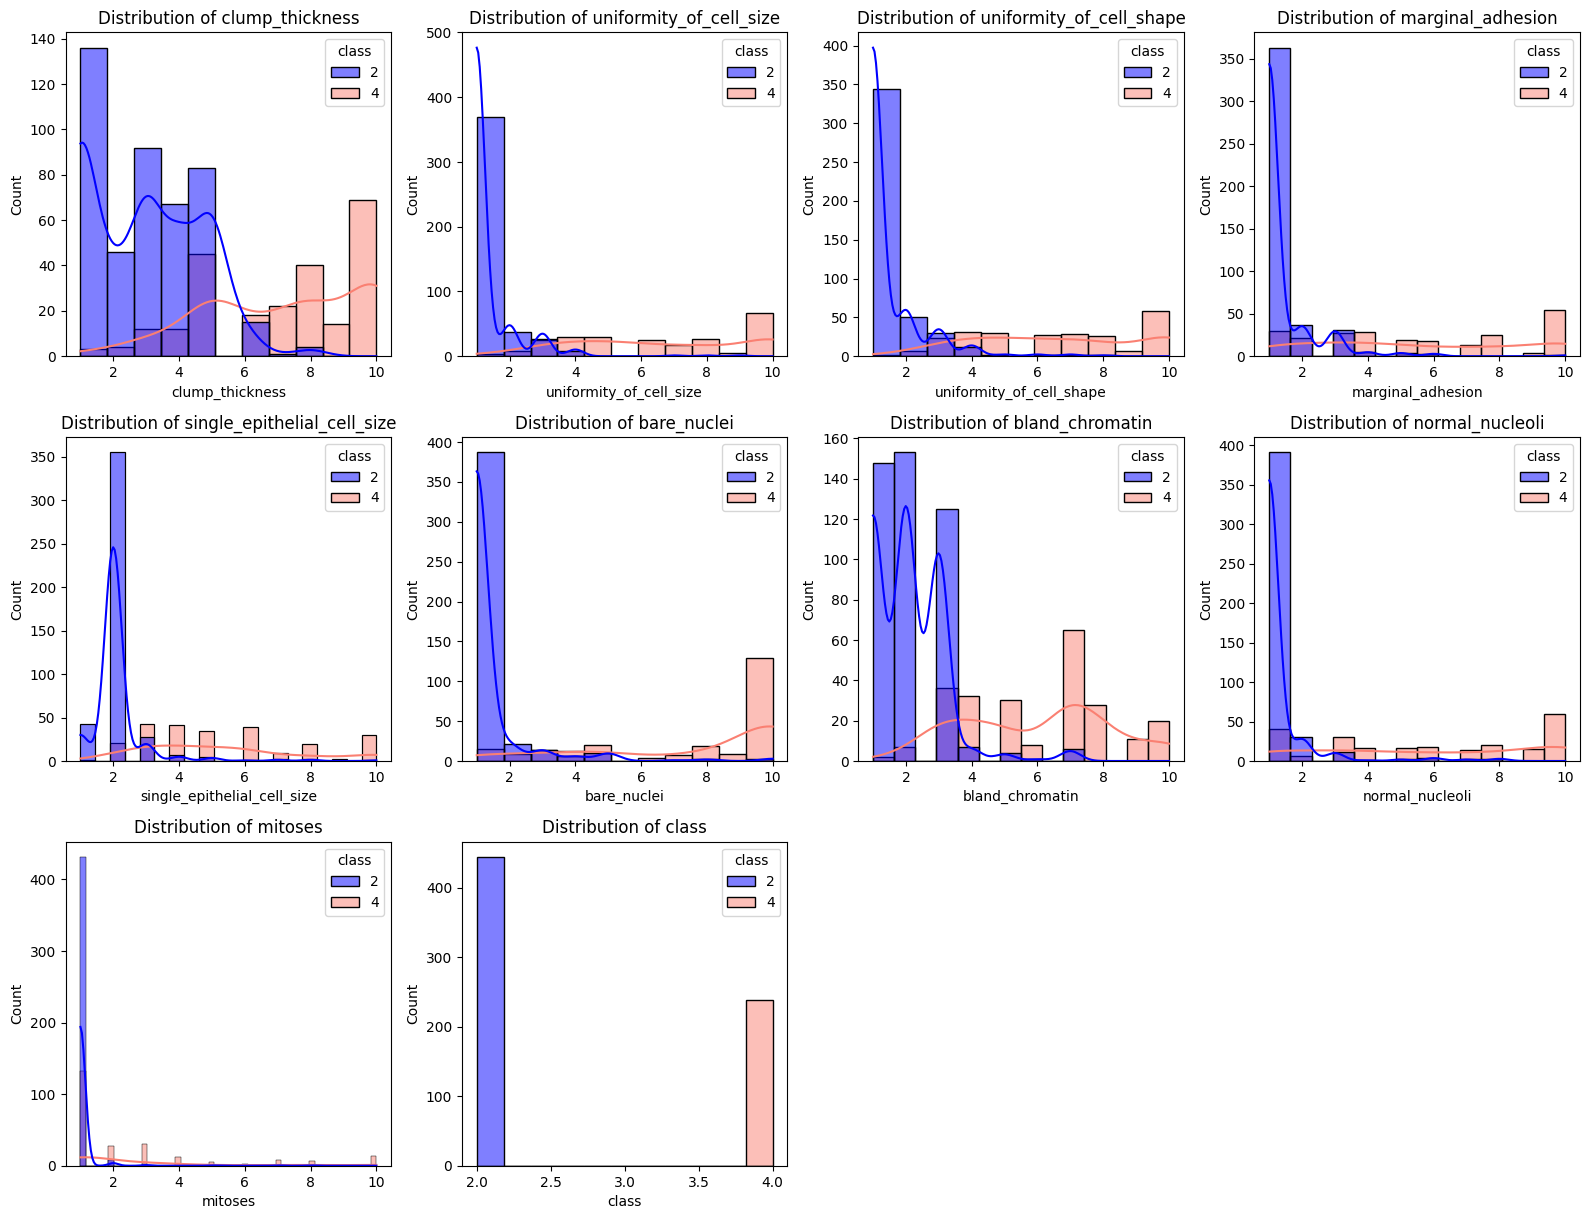

In [33]:
# EDA
plt.figure(figsize=(16, 24))
plot_cols = [col for col in raw_data.columns if col != "sample_code_number"]
for idx, col in enumerate(plot_cols, 1):
    plt.subplot(6, 4, idx)
    sns.histplot(x=raw_data[col], data=raw_data, kde=True, palette={2: 'blue', 4: 'salmon'}, hue='class')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()